## Geometric Operations to be covered including:-
### Scaling
### Rotation
### Transforming

#### These operations can be applied to any channel of an image.
#### In a geometric transformation, we change the coordinations f(y, x) to new g(ybar, xbar)
#### This transforms the image into the one we want.
#### We will deal with fine transformations, it is a subset of geometric transformations.

### SCALING

In [2]:
# Scaling is basically expanding or contracting the image in horizontal and/or vertical direction.
# For example, xbar = ax. where a is the scale factor.
# After scaling, we have pixel values in g that have no value corresponding in f, hence we use interpolation to predict
# the values of these missing cells. Interpolation uses neighboring pixels to determine the value of the unknown pixel.

### TRANSLATION

In [3]:
# Translation is when we shift the image. Shifting is basically moving every pixel in that direction with the given 
# magnitude.

# Combining the concept of translation and scaling, we get two equations, namely.
# xbar = ax + tx
# ybar = dy + ty
# we can convert this into a matrix, and that matrix is the input parameter that we given to our functions.
# Given Matrix:-
# [
# xbar = [a  0] [x] + [tx]
# ybar = [0  d] [y] + [ty]
# ]
# The 0s can be swapped with parameters as well, namely b and c, which are called the sheer parameters.

### ROTATION

In [4]:
# An image can also be rotated, it gets an angle theta and it is rotated with that magnitude.
# The rotation matrix is given as
# [rcos(theta)  rsin(theta) stuff]
# [-rsin(theta) rcos[theta] stuff]
# This rotation matrix performs a counter clockwise rotation.
# r is the isotropic scale factor. If we assume that r is 1, and we are rotating from that center of the image then we only
# need to provide theta to libraries such as PIL.

### CODE

In [5]:
from PIL import Image
from matplotlib import pyplot as plt

In [6]:
def plot2Images(imag1, imag2):
    plt.subplot(121)
    plt.imshow(imag1)
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(imag2)
    plt.title("Resized Image")
    plt.show()

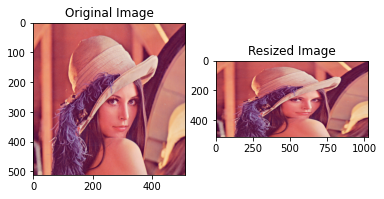

In [7]:
image = Image.open("lenna.png")
width = 512
height = 512

new_width = 2 * width # Scaling factor has to be an integer
new_height = height

new_image = image.resize([new_width, new_height])

plot2Images(image, new_image)

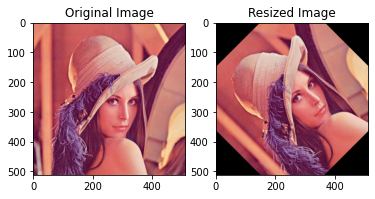

In [8]:
theta = 45

new_image = image.rotate(theta)

plot2Images(image, new_image)

In [11]:
#For OpenCV
import cv2
import numpy as np

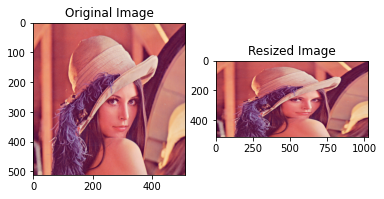

In [10]:
image = cv2.imread("lenna.png")

new_image = cv2.resize(image, None, fx=2, fy=1, interpolation= cv2.INTER_CUBIC)
# We provide the image, fx and fy are the scale factors and interpolation is the technique we will use to fill missing 
# pixel values.
# Scaling factor does not have to be an integer.
plot2Images(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

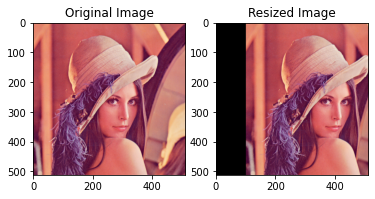

In [12]:
#Translation

rows, cols, _ = image.shape

tx = 100 # Number of pixels to shift in horizontal direction
ty = 0 # Number of pixels to shift in vertical direction

M = np.float32([[1, 0, tx], [0, 1, ty]]) # This is the transformation matrix we learnt about earlier
# Scale factors are 1
new_image = cv2.warpAffine(image, M, (cols, rows)) # We also provide the shape of the output image, we can provide a larger
# shape, (cols, rows) are the shape of the output image.

plot2Images(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

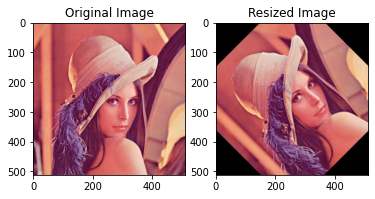

In [15]:
# We can also get the rotation matrix using openCV
theta = 45.0
M = cv2.getRotationMatrix2D(center = (cols//2 - 1, rows// 2 - 1), angle=theta, scale=1)
# Then we can provide this matrix to warpAffine, just like we provided it a matrix before.

new_image = cv2.warpAffine(image, M, (cols, rows))

plot2Images(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
